In [ ]:
%cd /content
!rm -r jawiOCR
!git clone https://github.com/mirzasyhm/jawiOCR.git
%cd /content/jawiOCR/

/content
Cloning into 'jawiOCR'...
remote: Enumerating objects: 568, done.
remote: Counting objects: 100% (190/190), done.
remote: Compressing objects: 100% (141/141), done.
remote: Total 568 (delta 110), reused 127 (delta 47), pack-reused 378 (from 1)
Receiving objects: 100% (568/568), 102.61 MiB | 17.04 MiB/s, done.
Resolving deltas: 100% (231/231), done.
/content/jawiOCR


In [ ]:
!pip install pip-tools
!pip install -r ./jord/requirements.txt
!pip install -r ./craft/requirements.txt

  Using cached tensorflow-2.17.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.2 kB)
  Using cached tf_keras-2.17.0-py3-none-any.whl.metadata (1.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 78.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 97.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.6/412.6 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 115.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.0/22.0 MB 82.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 80.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 867.7/867.7 kB 56.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 704.7/704.7 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.8/98.8 MB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 410.6/410.6 MB 211.1 MB/s eta 0:00:01^C


In [ ]:
%cd /content/jawiOCR/parseq_jawi/
!make clean-reqs reqs

/content/jawiOCR/parseq_jawi
rm -f requirements/constraints.txt requirements/core.*.txt requirements/bench.txt requirements/core.txt requirements/dev.txt requirements/test.txt requirements/train.txt requirements/tune.txt
CONSTRAINTS=/dev/null pip-compile --quiet --no-header --allow-unsafe --resolver=backtracking --strip-extras --output-file requirements/constraints.txt requirements/bench.in requirements/core.in requirements/dev.in requirements/test.in requirements/train.in requirements/tune.in --extra-index-url https://download.pytorch.org/whl/cpu
    Preparing metadata (setup.py) ... done
    Preparing metadata (setup.py) ... done
    Preparing metadata (setup.py) ... done
CONSTRAINTS=constraints.txt pip-compile --quiet --no-header --allow-unsafe --resolver=backtracking --strip-extras --no-annotate --output-file requirements/bench.txt requirements/bench.in
    Preparing metadata (setup.py) ... done
    Preparing metadata (setup.py) ... done
    Preparing metadata (setup.py) ... done
C

In [ ]:
platform = "cu121"

!make torch-{platform}
!pip install -r requirements/core.{platform}.txt -e .[train,test]
%cd ..

Generating requirements/core.cu121.txt
Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu121
Obtaining file:///content/jawiOCR/parseq_jawi
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Using cached packaging-25.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached protobuf-5.29.4-cp38-abi3-manylinux2014_x86_64.whl.metadata (592 bytes)
  Using cached opencv_python-4.11.0.86-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
  Using cached scikit_image-0.25.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (14 kB)
Using cached packaging-25.0-py3-none-any.whl (66 kB)
Using cached protobuf-5.29.4-cp38-abi3-manylinux2014_x86_64.whl (319 kB)
Using cached opencv_python-4.11.0.86-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (63.0 MB)
Using cached scik

In [ ]:
import os
%cd /content/jawiOCR/parseq_jawi/

# Create a folder to unzip into
os.makedirs("outputs", exist_ok=True)

# Download
!wget -O outputs.zip https://huggingface.co/datasets/mirzasyhm/checkpoint_jawi/resolve/main/outputs_color.zip

# Unzip into that folder
!unzip -q outputs.zip -d outputs

# Clean up
!rm outputs.zip

%cd ..

/content/jawiOCR/parseq_jawi
--2025-06-01 16:17:02--  https://huggingface.co/datasets/mirzasyhm/checkpoint_jawi/resolve/main/outputs_color.zip
Resolving huggingface.co (huggingface.co)... 13.35.202.34, 13.35.202.40, 13.35.202.97, ...
Connecting to huggingface.co (huggingface.co)|13.35.202.34|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs-us-1.hf.co/repos/a4/0e/a40edb5fee9aa56b081d76cebeb85749da8b1935a5194f415623e5924b1f8594/51ed8f3c2622c67b6b1135afb9b73ce7c65727cf6f70bd9ef1a6ddf9bebf208c?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27outputs_color.zip%3B+filename%3D%22outputs_color.zip%22%3B&response-content-type=application%2Fzip&Expires=1748798222&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTc0ODc5ODIyMn19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy11cy0xLmhmLmNvL3JlcG9zL2E0LzBlL2E0MGVkYjVmZWU5YWE1NmIwODFkNzZjZWJlYjg1NzQ5ZGE4YjE5MzVhNTE5NGY0MTU2MjNlNTkyNGIxZjg1OTQvNTFlZDhmM2MyNjIyYzY3

In [ ]:
import os
%cd /content/jawiOCR/craft/exp/

# Download
!wget -O CRAFT_clr_amp_12000.pth https://huggingface.co/datasets/mirzasyhm/checkpoint_jawi/resolve/main/CRAFT_clr_amp_12000.pth

%cd /content/jawiOCR/

/content/jawiOCR/craft/exp
--2025-06-01 16:17:08--  https://huggingface.co/datasets/mirzasyhm/checkpoint_jawi/resolve/main/CRAFT_clr_amp_12000.pth
Resolving huggingface.co (huggingface.co)... 13.35.202.121, 13.35.202.40, 13.35.202.34, ...
Connecting to huggingface.co (huggingface.co)|13.35.202.121|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs-us-1.hf.co/repos/a4/0e/a40edb5fee9aa56b081d76cebeb85749da8b1935a5194f415623e5924b1f8594/d4a890d8272c45581195e9fe07f9f722b3f4023d1a16bd8b94f780796c2ed067?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27CRAFT_clr_amp_12000.pth%3B+filename%3D%22CRAFT_clr_amp_12000.pth%22%3B&Expires=1748798228&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTc0ODc5ODIyOH19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy11cy0xLmhmLmNvL3JlcG9zL2E0LzBlL2E0MGVkYjVmZWU5YWE1NmIwODFkNzZjZWJlYjg1NzQ5ZGE4YjE5MzVhNTE5NGY0MTU2MjNlNTkyNGIxZjg1OTQvZDRhODkwZDgyNzJjNDU1ODExOTVlOWZlMDdmOWY3Mj

In [ ]:
!wget "https://huggingface.co/datasets/mirzasyhm/checkpoint_jawi/resolve/main/best_jawi_orientation_resnet50.keras"

--2025-06-01 16:17:09--  https://huggingface.co/datasets/mirzasyhm/checkpoint_jawi/resolve/main/best_jawi_orientation_resnet50.keras
Resolving huggingface.co (huggingface.co)... 13.35.202.121, 13.35.202.40, 13.35.202.34, ...
Connecting to huggingface.co (huggingface.co)|13.35.202.121|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs-us-1.hf.co/repos/a4/0e/a40edb5fee9aa56b081d76cebeb85749da8b1935a5194f415623e5924b1f8594/aff874538ba2a9cd11c53bffc4659ea1b1ade75d231b6f3dea595da0a07dcd44?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27best_jawi_orientation_resnet50.keras%3B+filename%3D%22best_jawi_orientation_resnet50.keras%22%3B&Expires=1748798229&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTc0ODc5ODIyOX19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy11cy0xLmhmLmNvL3JlcG9zL2E0LzBlL2E0MGVkYjVmZWU5YWE1NmIwODFkNzZjZWJlYjg1NzQ5ZGE4YjE5MzVhNTE5NGY0MTU2MjNlNTkyNGIxZjg1OTQvYWZmODc0NTM4YmEyYTljZDExYzUzYm

In [ ]:
!python jawiocr.py \
    --image_path ./jord/demo/180_3.jpg \
    --craft_model_path ./craft/exp/CRAFT_clr_amp_12000.pth \
    --parseq_model_path ./parseq_jawi/outputs/parseq/2025-05-12_10-45-42/checkpoints/last.ckpt \
    --output_dir ./my_jawi_results/ \
    --save_debug_crops \
    --custom_orientation_model_path best_jawi_orientation_resnet50.keras \
    --orientation_class_names "0_degrees,180_degrees,270_degrees,90_degrees" \
    --orientation_confidence_threshold 50.0 \
    --rerun_180_threshold 90.0 \
    --save_debug_crops
    #--use_simple_orientation \



2025-06-01 16:17:14.142312: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-06-01 16:17:14.163963: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-06-01 16:17:14.170334: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-01 16:17:15.334531: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Adjusted sys.path. Current sys.path[0:3]: ['/content/jawiOCR/parseq_jawi', '/content/jawiOCR/craft', '/content/jawiOCR']
TensorFlow version: 2.17.0
TensorFlow Found GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Usi

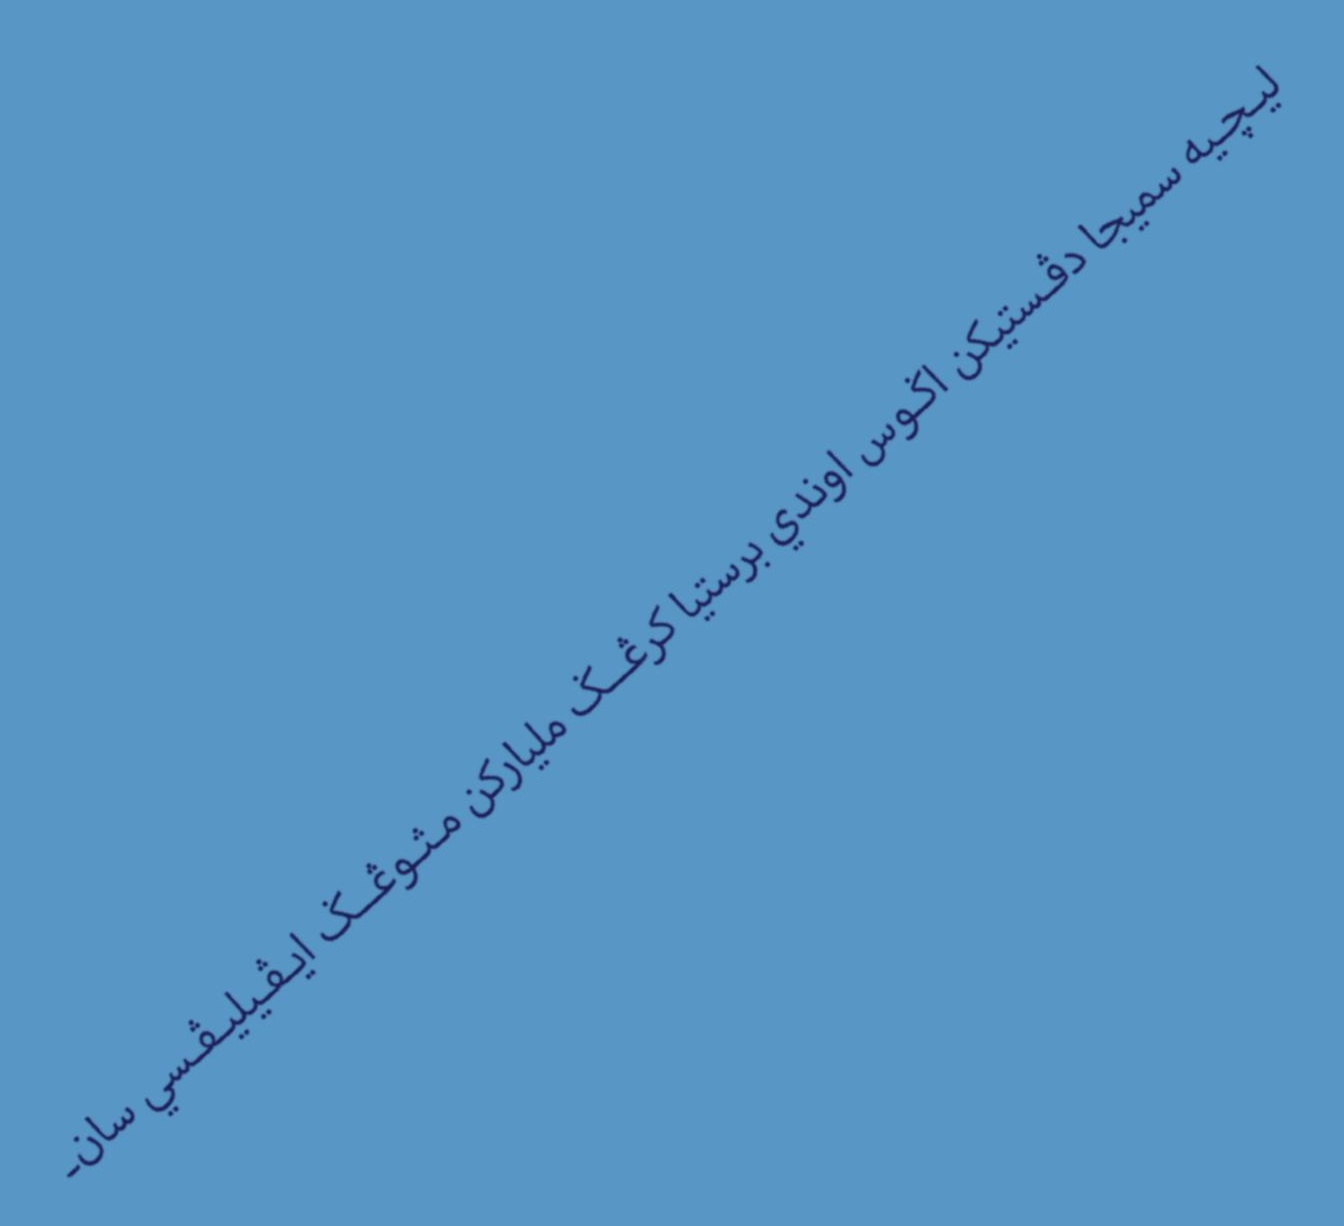

In [ ]:
from IPython.display import Image, display# Display image from Google Drive
display(Image('./my_jawi_results/res_ocr_180_3_final.jpg'))# Display image from local file systemdisplay(Image('/content/image.png', width=200, height=100))


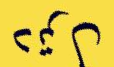

In [ ]:
from IPython.display import Image, display# Display image from Google Drive
display(Image('./my_jawi_results/debug_crops/90_1_pass_Pass2_180_Rot_sregion_4_crop.png'))# Display image from local file systemdisplay(Image('/content/image.png', width=200, height=100))

In [ ]:
!ls ./my_jawi_results/debug_crops/

90_1_page_for_pass2_180rot.png
90_1_pass_Pass1_sregion_1_crop.png
90_1_pass_Pass1_sregion_2_crop.png
90_1_pass_Pass1_sregion_3_crop.png
90_1_pass_Pass1_sregion_4_crop.png
90_1_pass_Pass1_sregion_5_crop.png
90_1_pass_Pass1_sregion_6_crop.png
90_1_pass_Pass2_180_Rot_sregion_1_crop.png
90_1_pass_Pass2_180_Rot_sregion_2_crop.png
90_1_pass_Pass2_180_Rot_sregion_3_crop.png
90_1_pass_Pass2_180_Rot_sregion_4_crop.png
90_1_pass_Pass2_180_Rot_sregion_5_crop.png
90_1_pass_Pass2_180_Rot_sregion_6_crop.png
90_2_page_custom_oriented_270deg.png
90_2_page_for_pass2_180rot.png
90_2_pass_Pass1_sregion_10_crop.png
90_2_pass_Pass1_sregion_11_crop.png
90_2_pass_Pass1_sregion_12_crop.png
90_2_pass_Pass1_sregion_1_crop.png
90_2_pass_Pass1_sregion_2_crop.png
90_2_pass_Pass1_sregion_3_crop.png
90_2_pass_Pass1_sregion_4_crop.png
90_2_pass_Pass1_sregion_5_crop.png
90_2_pass_Pass1_sregion_6_crop.png
90_2_pass_Pass1_sregion_7_crop.png
90_2_pass_Pass1_sregion_8_crop.png
90_2_pass_Pass1_sregion_9_crop.png
90_2_pass_

In [ ]:
!python parseq_jawi/read.py ./parseq_jawi/outputs/parseq/2025-05-12_10-45-42/checkpoints/last.ckpt --images ./parseq_jawi/demo_images/*

Additional keyword arguments: {}
/usr/local/lib/python3.11/dist-packages/timm/models/helpers.py:7: FutureWarning: Importing from timm.models.helpers is deprecated, please import via timm.models
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.models", FutureWarning)
./parseq_jawi/demo_images/Image160967.jpg: ڤروجودن
./parseq_jawi/demo_images/Image161005.jpg: يأجوجومأجوج
./parseq_jawi/demo_images/Image161078.jpg: يتيم
./parseq_jawi/demo_images/Image161571.jpg: زوفيت
./parseq_jawi/demo_images/Image161653.jpg: کلابقکن
./parseq_jawi/demo_images/Image168083.jpg: ملنتيڠ-لنتيڠ
./parseq_jawi/demo_images/Image168799.jpg: برلتوق-لتوق
./parseq_jawi/demo_images/Image182474.jpg: چوکايڽ
./parseq_jawi/demo_images/Image183203.jpg: دڤرݢوناکنڽ


In [ ]:
from google.colab import files


files.download('./my_jawi_results/res_ocr_demo_1.txt')
files.download('./my_jawi_results/res_ocr_demo_1.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!git pull

remote: Enumerating objects: 58, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 51 (delta 29), reused 38 (delta 17), pack-reused 0 (from 0)
Unpacking objects: 100% (51/51), 40.98 KiB | 182.00 KiB/s, done.
From https://github.com/mirzasyhm/jawiOCR
   e659685..2486038  main       -> origin/main
Updating e659685..2486038
Fast-forward
 craft/utils/util.py                     |   2 +-
 crnn/README.md                          |  16 +
 crnn/build_alphabet.py                  |  96 +++++
 crnn/dataset.py                         | 147 +++++++
 crnn/download_dataset.py                |  49 +++
 crnn/evaluation.py                      | 165 ++++++++
 crnn/model.py                           |  72 ++++
 crnn/requirements.txt                   |   9 +
 crnn/train.py                           | 185 +++++++++
 crnn/utils.py                           |  20 +
 parseq_jawi/tools/test_abinet_lm_acc.py |   2 +-
 test_crnn.py               

In [ ]:
!wget https://huggingface.co/datasets/mirzasyhm/synthetic_jawi_images/resolve/main/dataset_sentence_test.tar -O jawi.tar

!tar -xf jawi.tar

--2025-06-01 16:18:07--  https://huggingface.co/datasets/mirzasyhm/synthetic_jawi_images/resolve/main/dataset_sentence_test.tar
Resolving huggingface.co (huggingface.co)... 13.35.202.121, 13.35.202.34, 13.35.202.97, ...
Connecting to huggingface.co (huggingface.co)|13.35.202.121|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs-us-1.hf.co/repos/f9/16/f916668cb9026f1a501d38e183f8b89b65d2f31a4159ab1330ade73ab5a5fc1e/69c625d4c9074dff5f0bed84502b27a284a2229fd0bcf28a3fd750988cd942e2?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27dataset_sentence_test.tar%3B+filename%3D%22dataset_sentence_test.tar%22%3B&response-content-type=application%2Fx-tar&Expires=1748798288&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTc0ODc5ODI4OH19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy11cy0xLmhmLmNvL3JlcG9zL2Y5LzE2L2Y5MTY2NjhjYjkwMjZmMWE1MDFkMzhlMTgzZjhiODliNjVkMmYzMWE0MTU5YWIxMzMwYWRlNzNhYjVhNWZjMWUvNjljNjI1ZDRjOTA

In [ ]:
# 1. Mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!python test_parseq.py \
    --dataset_dir ./dataset_sentence_test/ \
    --craft_model_path ./craft/exp/CRAFT_clr_amp_12000.pth \
    --parseq_model_path ./parseq_jawi/outputs/parseq/2025-05-12_10-45-42/checkpoints/last.ckpt \
    --results_output_dir  ./test_results/ \
    --limit_test_to_n_images 0 \
    --custom_orientation_model_path best_jawi_orientation_resnet50.keras \
    --orientation_class_names "0_degrees,180_degrees,270_degrees,90_degrees" \
    --orientation_confidence_threshold 50.0 \
    --rerun_180_threshold 90.0


2025-06-01 18:17:48.923760: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-06-01 18:17:48.945213: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-06-01 18:17:48.951689: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-01 18:17:50.150325: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
TensorFlow version: 2.17.0
TensorFlow Found GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Initializing JawiOCR Engine...
JawiOCREngine: Using PyTorch device: cuda
Loading CRAFT weights from: ./craft/exp/CRAFT_clr_a

In [ ]:
from google.colab import drive
local_path = './test_results/e2e_test_summary.txt'               # path to the file in Colab VM
drive_path = '/content/drive/MyDrive/'  # target path in your Drive

# 3. Copy the file into Drive
import shutil
shutil.copy(local_path, drive_path)

print(f"Saved {local_path} to {drive_path}")

Saved ./test_results/e2e_test_summary.txt to /content/drive/MyDrive/


In [ ]:
from google.colab import files
files.download('./test_results/e2e_test_summary.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>